In [77]:
!pip install scipy

In [2]:
######################################
#             page rank              #
######################################

import numpy as np
import scipy as sp

# define probability matrix
M = np.array([[0.0, 0.0, 0.5, 0.0],
              [1/3, 0.0, 0.0, 0.5],
              [1/3, 0.5, 0.0, 0.5],
              [1/3, 0.5, 0.5, 0.0]])

# print(M[:,1]) # debug

# calculate eigenvectors of matrix and pick dominant to represent PageRank
evals, evecs = sp.linalg.eig(M)
dom_evec = evecs[0]
print(evecs)

# normalize PageRanks
dom_evec /= sum(dom_evec)

# initialize variables for convergence analysis
v = np.array([1,1,1,1])
v0 = np.zeros(4)
diff = sum(abs(v0-v))

# iteratively simulate convergence of probabilities to PageRanks
while diff > 0.00001:
    v0 = v
    v = np.matmul(M,v)
    v /= sum(v)
    #print(v)
    #print(v0)
    diff = abs(sum(v0-v))

    

[0.  0.  0.5 0.5]
[[ 3.04603850e-01+0.j         -7.07106781e-01+0.j
  -7.07106781e-01-0.j         -1.07019571e-16+0.j        ]
 [ 4.06138466e-01+0.j         -7.88456989e-17+0.40824829j
  -7.88456989e-17-0.40824829j -7.07106781e-01+0.j        ]
 [ 6.09207699e-01+0.j          3.53553391e-01-0.20412415j
   3.53553391e-01+0.20412415j  5.55111512e-16+0.j        ]
 [ 6.09207699e-01+0.j          3.53553391e-01-0.20412415j
   3.53553391e-01+0.20412415j  7.07106781e-01+0.j        ]]
[0.125      0.20833333 0.33333333 0.33333333]
[1 1 1 1]
[0.16666667 0.20833333 0.3125     0.3125    ]
[0.125      0.20833333 0.33333333 0.33333333]


(2, 2)
Principle Component 0:
Eigenvalue: 0.9328277363479238
Eigenvector: [-0.78376051  0.62106317]

Principle Component 1:
Eigenvalue: 1.1746090462815435
Eigenvector: [0.62106317 0.78376051]

Largest Principle Component:
Eigenvalue: 1.1746090462815435
Eigenvector: [0.62106317 0.78376051]


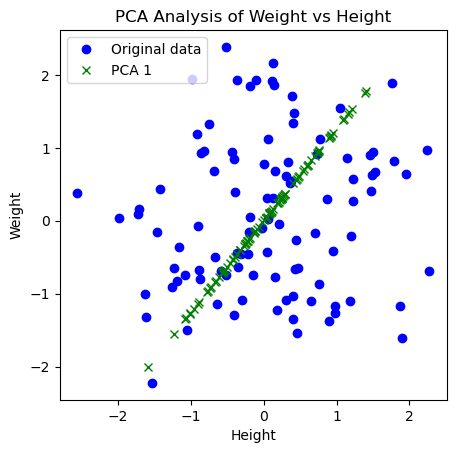

In [63]:
######################################
#               PCA                  #
######################################
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

data = np.genfromtxt("data.csv", delimiter=",", skip_header=1)
data = np.transpose(data)
plt.plot(data[0,:], data[1,:], "bo", label="Original data")

covar = np.cov(data)

evals, evecs = sp.linalg.eigh(covar)
count=0

print(covar.shape)

for eval in evals:
    print(f"Principle Component {count}:\nEigenvalue: {eval}\nEigenvector: {evecs[count]}\n")
    count += 1
print(f"Largest Principle Component:\nEigenvalue: {evals[evals.argmax()]}\nEigenvector: {evecs[evals.argmax()]}")

# flattened_0 = [evecs[0][0]*data[0,:], evecs[0][1]*data[0,:]]
# hard coded majority component value
flattened_1 = [evecs[1][0]*data[0,:], evecs[1][1]*data[0,:]]

ax1 = plt.gca()
#set1 = ax1.plot(flattened_0[0], flattened_0[1], "rx", label="PCA 0")
set2 = ax1.plot(flattened_1[0], flattened_1[1], "gx", label="PCA 1")
ax1.set_aspect('equal', adjustable='box')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("PCA Analysis of Weight vs Height")
plt.legend(loc='upper left')
plt.savefig("PCA_result.png")


In [268]:
######################################
#        Least Squares Linreg        #
######################################
import numpy as np
import scipy as sp

house_features = np.array([[2100, 3, 20],
                           [2500, 4, 15],
                           [1800, 2, 30],
                           [2200, 3, 25]]) 
house_prices = np.array([460, 540, 330, 400])

lstsq, residues, rank, s = sp.linalg.lstsq(house_features, house_prices)

# use to predict

new_house = [2400, 3, 20]

# this is really screwy for some reason?
new_house_price = round(np.matmul(lstsq, new_house), 4)
print(f"LEAST SQUARES SOLUTION\nHouse with \nSquare Footage: {new_house[0]}\nBathrooms: {new_house[1]}\nYears old: {new_house[2]}\nPredicted Cost: ${new_house_price}\n")

# compare to linalg.solve() which requires a square matrix
direct_solve = sp.linalg.solve(house_features[0:3], house_prices[0:3])
print(f"Least Squares solution: {lstsq}")
print(f"Direct solution: {direct_solve}\n")
new_house_price = round(np.matmul(direct_solve, new_house), 4)
print(f"DIRECT SOLUTION\nHouse with \nSquare Footage: {new_house[0]}\nBathrooms: {new_house[1]}\nYears old: {new_house[2]}\nPredicted Cost: ${new_house_price}\n")

# both solve reasonably but least-squares allows for the consideration of more data at
# the danger of overfitting the prediction

LEAST SQUARES SOLUTION
House with 
Square Footage: 2400
Bathrooms: 3
Years old: 20
Predicted Cost: $1448.75

Least Squares solution: [    3.2875 -1628.75     -77.75  ]
Direct solution: [    2.85 -1395.     -67.  ]

DIRECT SOLUTION
House with 
Square Footage: 2400
Bathrooms: 3
Years old: 20
Predicted Cost: $1315.0



[0.70112022 0.95287527 0.32703707 ... 0.0226551  0.4446136  0.93429534]
LOSS VALUES:  [2.87794815e+02 8.08589784e+01 1.37642121e-08 1.38772490e-13]


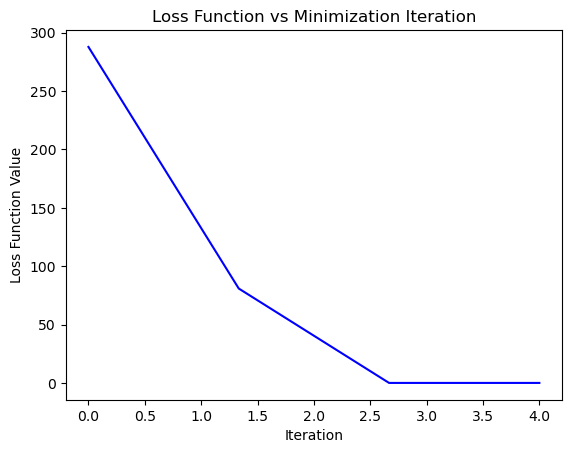

In [171]:
######################################
#        Gradient Descent            #
######################################

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# void callback function to be passed into the minimization function
# will store the iteration's loss values and x array in the global
# verbose variable, return nothing
def callback_func(intermediate_result):
    global verbose
    verbose = np.append(verbose, intermediate_result)
    return

A = np.random.rand(5000) # 1D version of 100x50 "target" matrix
print(A)

loss_func = lambda X : 0.5 * sum((X-A) ** 2)

verbose = np.array([]) # container for mid-minimization stat output

X = np.random.rand(5000) # Initial random guess 

#print(loss_func(X)) # sanity check

# main minimization, goes until loss function dips below tolerance and output
# loss values to callback function at every iteration
result = sp.optimize.minimize(loss_func, X, tol=1e-6, callback=callback_func) 
X_final = np.split(result["x"], 50)  # regenerate 100x50 array

loss_vals = np.array([])

# extract loss values at each iteration from callback output
for entry in verbose:
    loss_vals = np.append(loss_vals, entry["fun"])

# debug
print("LOSS VALUES: ",loss_vals)

# set up ticks for x axis
x_ticks = np.linspace(0, len(loss_vals), len(loss_vals))

# plot progression of loss value over iterations of minimization
plt.plot(x_ticks, loss_vals, "b-")
plt.xlabel("Iteration")
plt.ylabel("Loss Function Value")
plt.title("Loss Function vs Minimization Iteration")
plt.savefig("lossvals.png")

#print(X_final)



